<a href="https://colab.research.google.com/github/alenready/ML_AI_ICT-Assignments/blob/main/Another_copy_of_Mobile_Price_Classification_ANN10_12_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step1: Import Libraries

In [1]:
!pip install scikeras

In [2]:
# prompt: ! pip install necessary libraries for ANN

!pip install tensorflow
!pip install keras
!pip install scikit-learn


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.optimizers import Adam
# Install scikeras if you haven't already
!pip install scikeras
# Instead of keras.wrappers.scikit_learn, use scikeras.wrappers
from scikeras.wrappers import KerasClassifier # Import KerasClassifier from scikeras.wrappers
from sklearn.metrics import accuracy_score #Import accuracy_score

##Step2 .Load data set

In [4]:
data=pd.read_csv("/content/mobile_price_classification.csv")
data

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [36]:
# prompt: make copy of data

datacopy = pd.read_csv("/content/mobile_price_classification.csv")


,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


##Step3. Preprocess the data

In [5]:
# Explore the data
print(data.head())
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

   battery_power  bluetooth  clock_speed  dual_sim  front_cam  4G  int_memory  \
0            842          0          2.2         0          1   0           7   
1           1021          1          0.5         1          0   1          53   
2            563          1          0.5         1          2   1          41   
3            615          1          2.5         0          0   0          10   
4           1821          1          1.2         0         13   1          44   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0    0.6        188        2  ...         20       756  2549     9     7   
1    0.7        136        3  ...        905      1988  2631    17     3   
2    0.9        145        5  ...       1263      1716  2603    11     2   
3    0.8        131        6  ...       1216      1786  2769    16     8   
4    0.6        141        2  ...       1208      1212  1411     8     2   

   talk_time  three_g  touch_screen  wifi  price_range  

In [6]:
# Check for duplicates
print(f"Number of duplicated rows: {data.duplicated().sum()}")
data.drop_duplicates(inplace=True)


Number of duplicated rows: 0


<ipython-input-7-4fcb5c0efb89>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette='viridis')


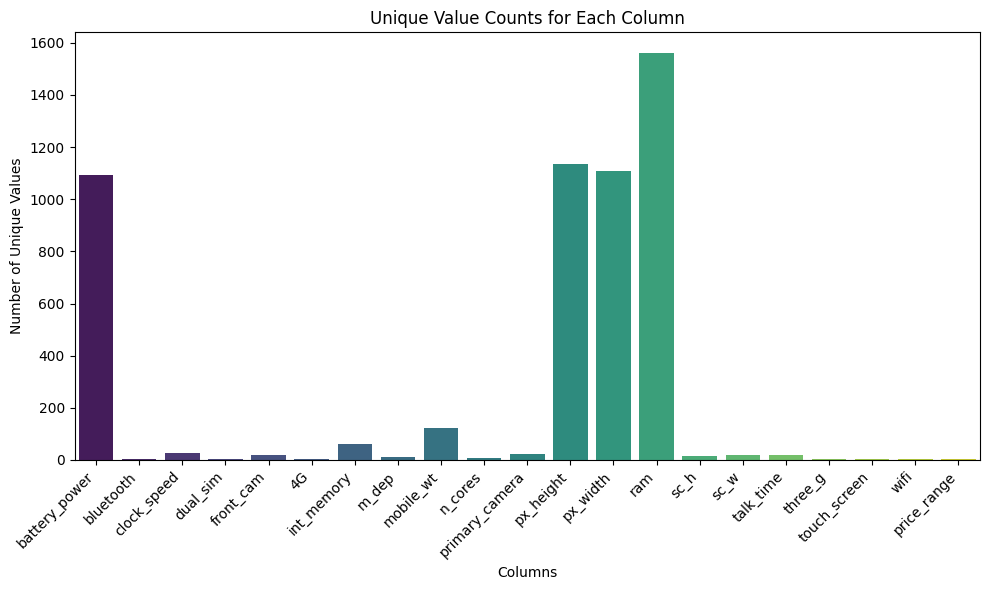

In [7]:
# prompt: unique values and visulaise

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded as in your previous code

# Calculate unique values for each column
unique_counts = data.nunique()

# Create a colorful bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=unique_counts.index, y=unique_counts.values, palette='viridis')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.title('Unique Value Counts for Each Column')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

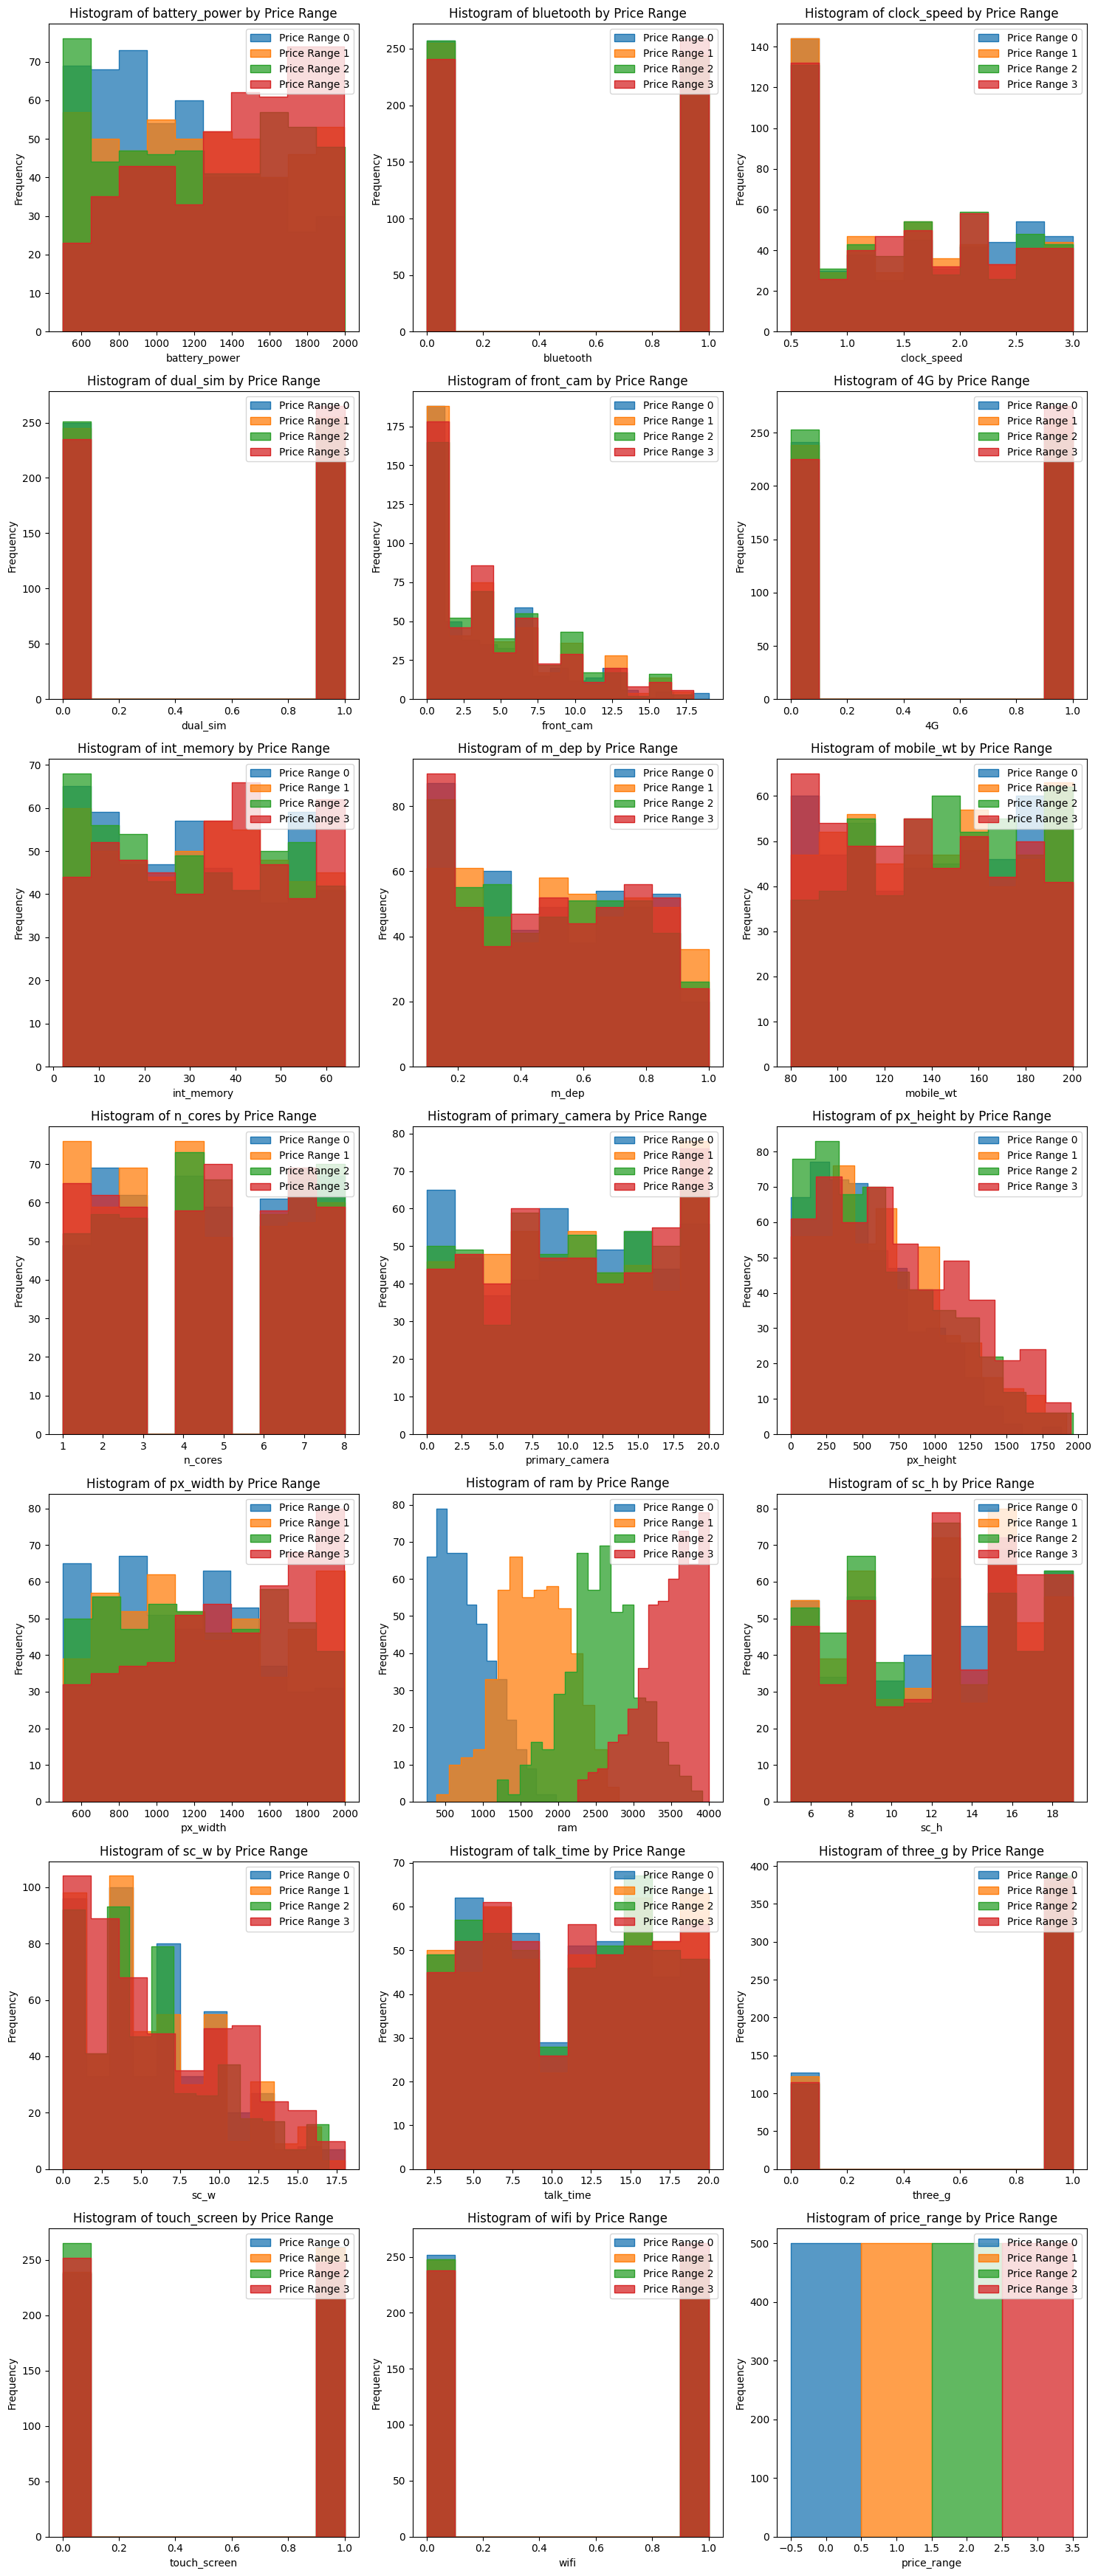

In [8]:
# prompt:  histogram grouped by price

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by 'price_range'
grouped_data = data.groupby('price_range')


# Create histograms for each column, grouped by price_range
num_cols = len(data.columns)
num_rows = (num_cols + 2) // 3  # Calculate number of rows for subplots

plt.figure(figsize=(15, 5 * num_rows))

for i, column in enumerate(data.columns):
    plt.subplot(num_rows, 3, i + 1)  # Adjust layout as needed
    for price_range, group in grouped_data:
        sns.histplot(group[column], label=f'Price Range {price_range}', kde=False, element="step")
    plt.title(f'Histogram of {column} by Price Range')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

Categorical Features:
Index([], dtype='object')

Numerical Features:
Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam',
       '4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Descriptive statistics for numerical features:
       battery_power  bluetooth  clock_speed     dual_sim    front_cam  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     

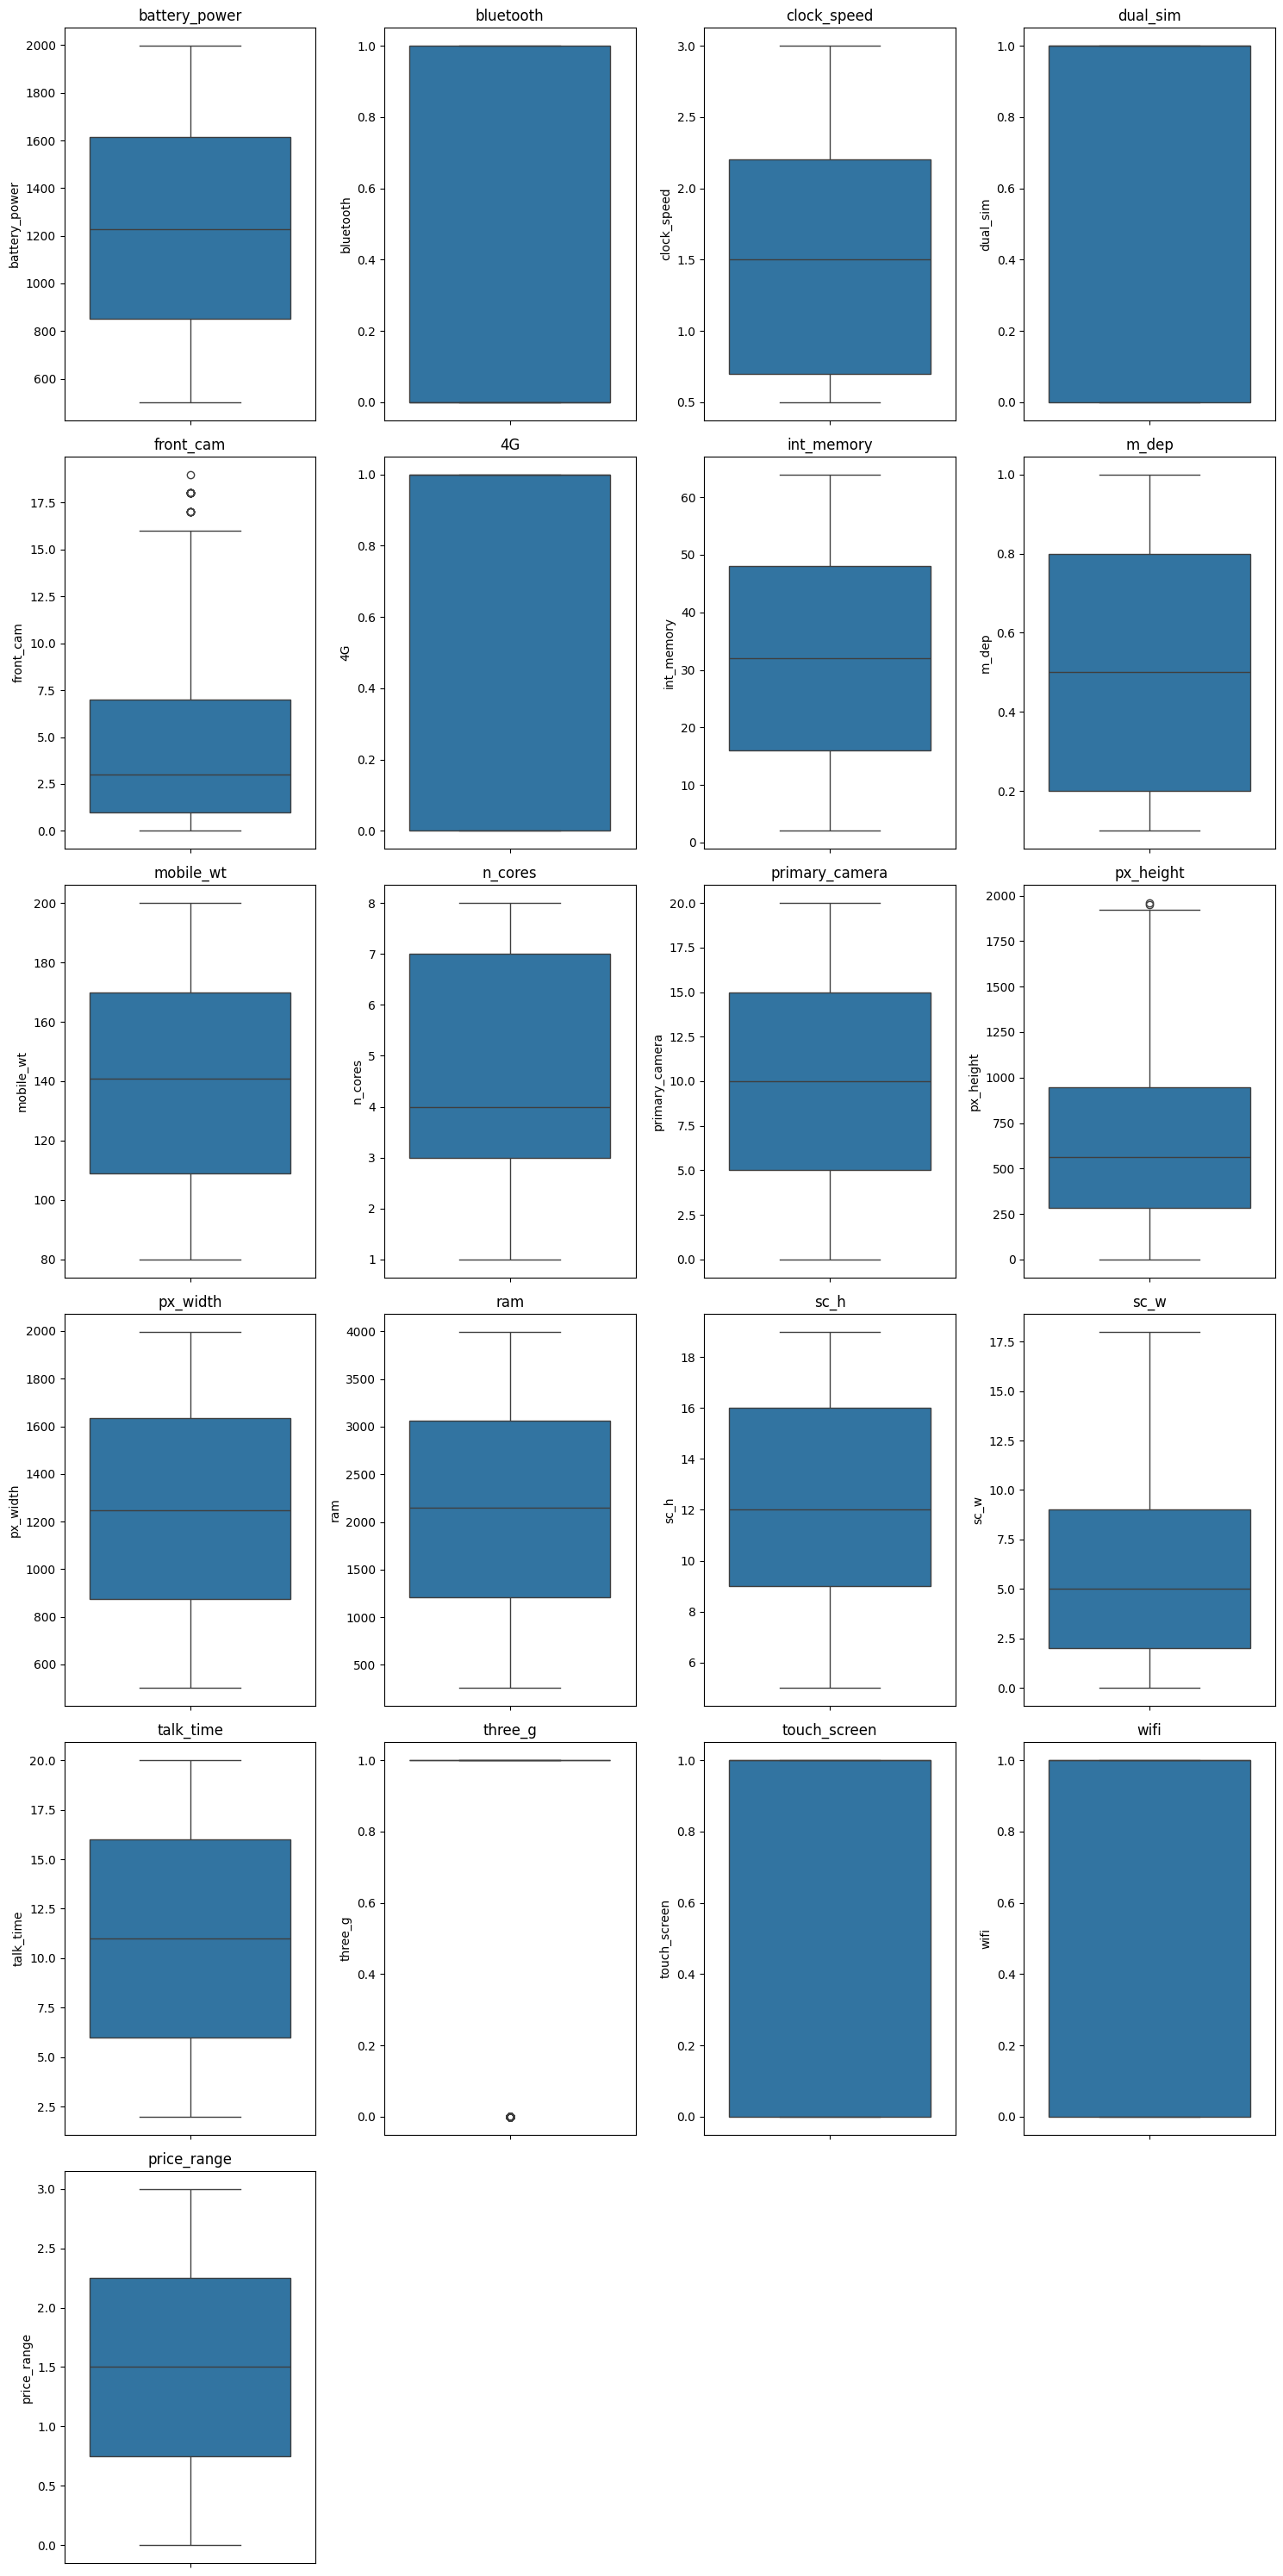

<Figure size 640x480 with 0 Axes>

In [9]:
# prompt: explore categorical and numerical features

# Assuming 'data' DataFrame is already loaded as in your previous code

# Separate categorical and numerical features
categorical_features = data.select_dtypes(include=['object']).columns
numerical_features = data.select_dtypes(include=['number']).columns

print("Categorical Features:")
print(categorical_features)

print("\nNumerical Features:")
print(numerical_features)

# Explore categorical features (example: value counts)
for feature in categorical_features:
    print(f"\nValue counts for {feature}:")
    print(data[feature].value_counts())

# Explore numerical features (example: descriptive statistics)
print("\nDescriptive statistics for numerical features:")
print(data[numerical_features].describe())


# You can further explore numerical features using visualizations
# Example: Box plots to see distributions and potential outliers
import matplotlib.pyplot as plt
import seaborn as sns
# Adjust the subplot layout to accommodate all features
num_features = len(numerical_features)
num_cols = 4  # Number of columns you want
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows needed

plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size if necessary

for i, feature in enumerate(numerical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=data[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

In [10]:
# Example: scaling numerical features
numerical_features = data.select_dtypes(include=np.number).columns.tolist()
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [11]:

data[numerical_features]

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,...,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097,-0.447214
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,...,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099,0.447214
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,...,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099,0.447214
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,...,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099,0.447214
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,...,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099,-0.447214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-0.992890,0.957886,-1.656260,1.034357,-0.967737,0.646842,...,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099,-1.341641
1996,1.653694,1.010051,1.321096,0.981177,-0.992890,-1.043966,0.383299,-1.046495,1.320993,-0.227564,...,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097,0.447214
1997,1.530773,-0.990050,-0.762748,0.981177,-0.762495,0.957886,0.217930,0.687548,-0.911225,1.521249,...,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099,1.341641
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.071307,0.957886,0.769162,-1.393304,0.134244,0.209639,...,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097,-1.341641


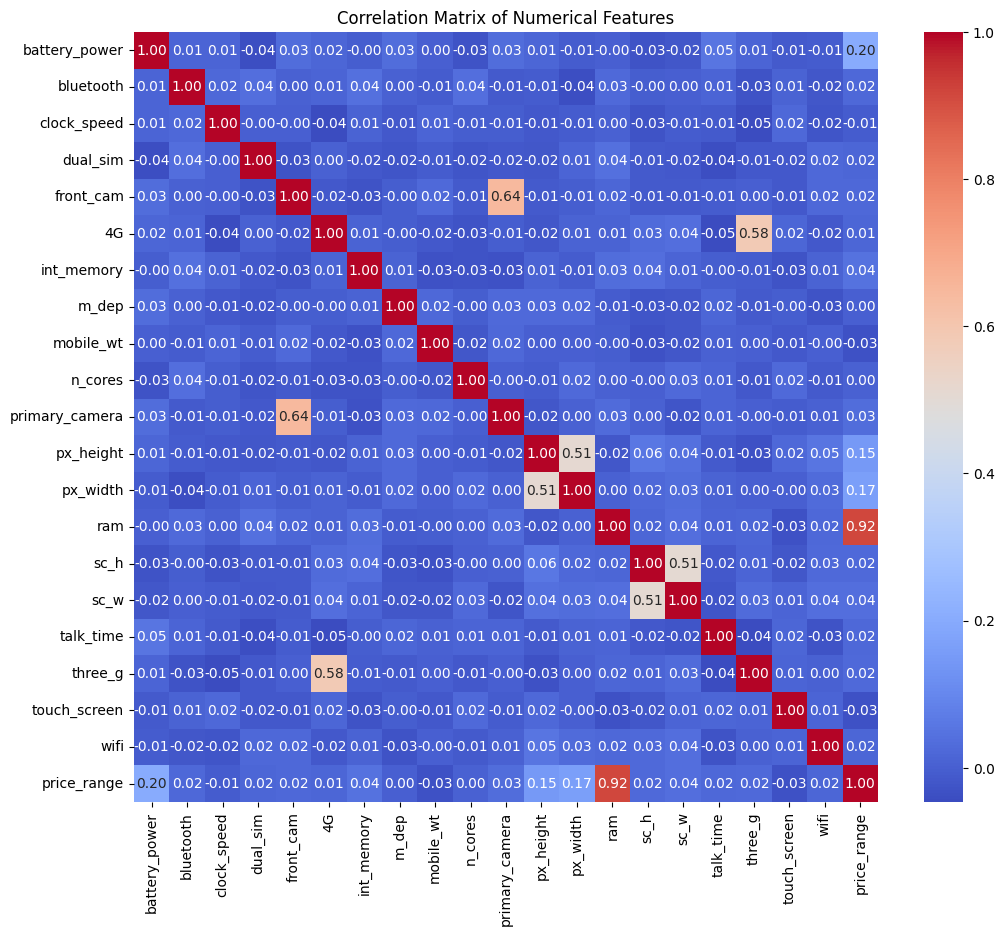

In [12]:
# prompt: - visualize relationships between variables

# Create a heatmap of correlations
plt.figure(figsize=(12, 10))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [13]:
# Separate features and labels
X = data.drop('price_range', axis=1)
y = data['price_range']


In [14]:
# prompt: seperate features and labels and print

# Print the features (X)
print("Features (X):")
print(X)

# Print the labels (y)
print("\nLabels (y):")
y

Features (X):
      battery_power  bluetooth  clock_speed  dual_sim  front_cam        4G  \
0         -0.902597  -0.990050     0.830779 -1.019184  -0.762495 -1.043966   
1         -0.495139   1.010051    -1.253064  0.981177  -0.992890  0.957886   
2         -1.537686   1.010051    -1.253064  0.981177  -0.532099  0.957886   
3         -1.419319   1.010051     1.198517 -1.019184  -0.992890 -1.043966   
4          1.325906   1.010051    -0.395011 -1.019184   2.002254  0.957886   
...             ...        ...          ...       ...        ...       ...   
1995      -1.011860   1.010051    -1.253064  0.981177  -0.992890  0.957886   
1996       1.653694   1.010051     1.321096  0.981177  -0.992890 -1.043966   
1997       1.530773  -0.990050    -0.762748  0.981177  -0.762495  0.957886   
1998       0.622527  -0.990050    -0.762748 -1.019184  -0.071307  0.957886   
1999      -1.658331   1.010051     0.585621  0.981177   0.159088  0.957886   

      int_memory     m_dep  mobile_wt   n_cores  

,price_range
0,-0.447214
1,0.447214
2,0.447214
3,0.447214
4,-0.447214
...,...
1995,-1.341641
1996,0.447214
1997,1.341641
1998,-1.341641


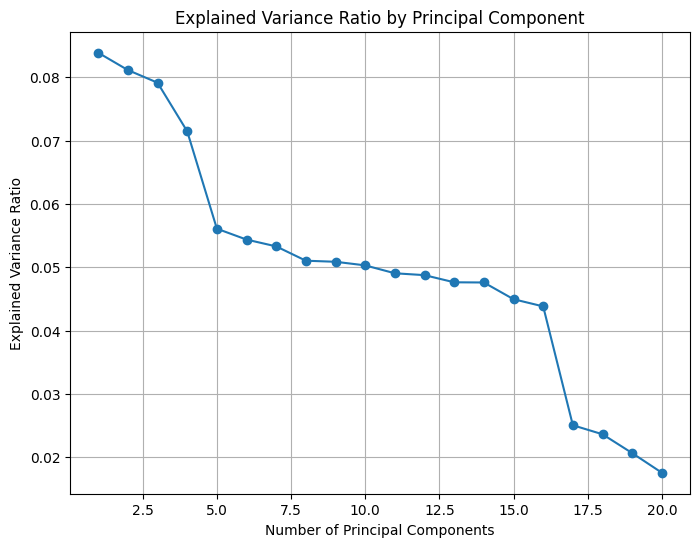

Number of components explaining at least 95% of variance: 18
Reduced PCA data shape: (2000, 18)


In [15]:
# prompt: pca foa data

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'X' and 'y' are already defined as in your previous code

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.grid(True)
plt.show()

# Determine the number of components to retain (e.g., 95% variance)
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance >= 0.95) + 1  # Adjust the threshold as needed

print(f"Number of components explaining at least 95% of variance: {n_components}")

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca_reduced = pca.fit_transform(X_scaled)

print("Reduced PCA data shape:", X_pca_reduced.shape)

In [16]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step4 . Build ANN model Classifier

In [17]:
data.shape

(2000, 21)

In [18]:
data.tail(5)

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,-1.011860,1.010051,-1.253064,0.981177,-0.992890,0.957886,-1.656260,1.034357,-0.967737,0.646842,...,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099,-1.341641
1996,1.653694,1.010051,1.321096,0.981177,-0.992890,-1.043966,0.383299,-1.046495,1.320993,-0.227564,...,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097,0.447214
1997,1.530773,-0.990050,-0.762748,0.981177,-0.762495,0.957886,0.217930,0.687548,-0.911225,1.521249,...,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099,1.341641
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.071307,0.957886,0.769162,-1.393304,0.134244,0.209639,...,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097,-1.341641
1999,-1.658331,1.010051,0.585621,0.981177,0.159088,0.957886,0.714039,1.381165,0.784130,0.646842,...,-0.365380,-1.151413,1.655004,1.589078,-0.405712,-1.649584,0.559641,0.994018,0.986097,1.341641


In [19]:
# Convert y_train to integer type
y_train = y_train.astype(int)

# Convert y_test to integer type as well for consistency
y_test = y_test.astype(int)

In [20]:
data.shape

(2000, 21)

In [21]:
# prompt: download the data as Data_modified

# Assuming 'data' DataFrame is already processed as in your previous code.
from google.colab import files
data.to_csv('Data_modified.csv', encoding = 'utf-8-sig')
files.download('Data_modified.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
# prompt: find AI models to find price_range using random search cv

# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV for RandomForest
from sklearn.model_selection import RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid_rf, n_iter=10, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)
random_search_rf.fit(X_train, y_train)

# Print the best hyperparameters and score for RandomForest
print("Best Hyperparameters (RandomForest):", random_search_rf.best_params_)
print("Best Score (RandomForest):", random_search_rf.best_score_)

# Evaluate the best RandomForest model on the test set
best_rf_model = random_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))


# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # Solvers that support L1 penalty
}

# Create a LogisticRegression model
lr_classifier = LogisticRegression(random_state=42, max_iter=1000)  # Increase max_iter if needed

# Perform RandomizedSearchCV for Logistic Regression
random_search_lr = RandomizedSearchCV(estimator=lr_classifier, param_distributions=param_grid_lr, n_iter=10, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)
random_search_lr.fit(X_train, y_train)

# Print the best hyperparameters and score for Logistic Regression
print("Best Hyperparameters (Logistic Regression):", random_search_lr.best_params_)
print("Best Score (Logistic Regression):", random_search_lr.best_score_)


# Evaluate the best Logistic Regression model on the test set
best_lr_model = random_search_lr.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)
print(classification_report(y_test, y_pred_lr))

Best Hyperparameters (RandomForest): {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Best Score (RandomForest): 0.920625
              precision    recall  f1-score   support

          -1       0.95      0.94      0.95       105
           0       0.86      0.94      0.90       183
           1       0.94      0.81      0.87       112

    accuracy                           0.91       400
   macro avg       0.92      0.90      0.91       400
weighted avg       0.91      0.91      0.90       400

Best Hyperparameters (Logistic Regression): {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}
Best Score (Logistic Regression): 0.985
              precision    recall  f1-score   support

          -1       1.00      0.95      0.98       105
           0       0.97      0.99      0.98       183
           1       0.98      0.99      0.99       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       40

In [23]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.6 MB/s eta 0:00:00


In [24]:
# prompt: ANN model clasifier

def create_ann_model(optimizer='adam',init='glorot_uniform'):
    model = Sequential()
    model.add(Dense(units=16,kernel_initializer=init,activation='relu',input_dim=20))
    model.add(Dropout(0.25)) #Adding a dropout layer to avoid overfitting
    model.add(Dense(units=12,kernel_initializer=init,activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(units=8,kernel_initializer=init,activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(units=4,kernel_initializer=init,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

# Create a KerasClassifier wrapper
ann_classifier = KerasClassifier(model=create_ann_model, epochs=50, batch_size=32, verbose=0)

# Define the parameter grid
param_grid = {
    'model__optimizer': ['adam', 'rmsprop'],
    'model__init': ['glorot_uniform', 'normal']
}

# Perform GridSearchCV
grid = GridSearchCV(estimator=ann_classifier, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Evaluate the best model on the test set
y_pred_ann = grid_result.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_ann)
print("Accuracy of ANN model:", accuracy)
print(classification_report(y_test, y_pred_ann))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best: 0.937500 using {'model__init': 'normal', 'model__optimizer': 'adam'}
Accuracy of ANN model: 0.9625
              precision    recall  f1-score   support

          -1       0.99      0.89      0.93       105
           0       0.93      0.99      0.96       183
           1       0.99      0.99      0.99       112

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [31]:
# prompt: column of y

print("\nLabels (y):")
y


Labels (y):


,price_range
0,-0.447214
1,0.447214
2,0.447214
3,0.447214
4,-0.447214
...,...
1995,-1.341641
1996,0.447214
1997,1.341641
1998,-1.341641


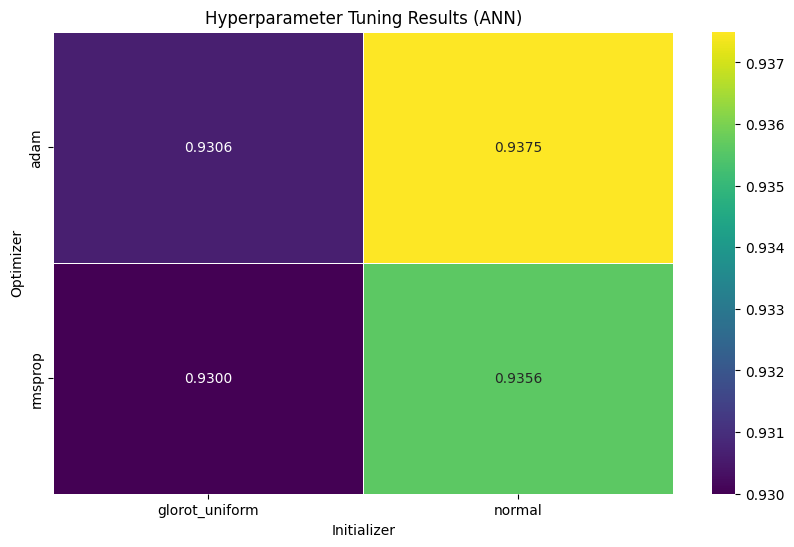

In [25]:
#  visualise the hypertunning parameters from ANN model


# Assuming grid_result from your previous code
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

# Create a list to store the results in a structured way
results = []
for mean, stdev, param in zip(means, stds, params):
    results.append([param['model__optimizer'], param['model__init'], mean, stdev])


results_df = pd.DataFrame(results, columns=['Optimizer', 'Initializer', 'Mean Test Score', 'Std Test Score'])


# Create a colorful heatmap
plt.figure(figsize=(10, 6))
pivot_table = results_df.pivot(index='Optimizer', columns='Initializer', values='Mean Test Score')
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".4f", linewidths=.5)
plt.title('Hyperparameter Tuning Results (ANN)')
plt.xlabel('Initializer')
plt.ylabel('Optimizer')
plt.show()

In [30]:


# Define the best hyperparameters from the previous GridSearchCV
best_optimizer = 'adam'  # Replace with your actual best optimizer
best_init = 'glorot_uniform'  # Replace with your actual best initializer

# Define the ANN model with the best hyperparameters
def create_best_ann_model():
    model = Sequential()
    model.add(Dense(units=16, kernel_initializer=best_init, activation='relu', input_dim=20))
    model.add(Dropout(0.25))
    model.add(Dense(units=12, kernel_initializer=best_init, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(units=8, kernel_initializer=best_init, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(units=4, kernel_initializer=best_init, activation='softmax'))  # Output layer
    model.compile(loss='sparse_categorical_crossentropy', optimizer=best_optimizer, metrics=['accuracy'])
    return model

# Create and train the best ANN model
best_model = create_best_ann_model()
best_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)  # Train the model


# Make predictions on the test set
y_pred_ann = np.argmax(best_model.predict(X_test), axis=1)  # Get predicted class labels

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_ann)
print("Accuracy of best ANN model:", accuracy)
print(classification_report(y_test, y_pred_ann))

# Example usage to create new column 'predicted_price_range'
data['predicted_price_range'] = best_model.predict(X).argmax(axis=1)
print(data.head(10))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Accuracy of best ANN model: 0.4575
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       105
           0       0.46      1.00      0.63       183
           1       0.00      0.00      0.00       112

    accuracy                           0.46       400
   macro avg       0.15      0.33      0.21       400
weighted avg       0.21      0.46      0.29       400

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
   battery_power  bluetooth  clock_speed  dual_sim  front_cam        4G  \
0      -0.902597  -0.990050     0.830779 -1.019184  -0.762495 -1.043966   
1      -0.495139   1.010051    -1.253064  0.981177  -0.992890  0.957886   
2      -1.537686   1.010051    -1.253064  0.981177  -0.532099  0.957886   
3      -1.419319   1.010051     1.198517 -1.019184  -0.992890 -1.043966   
4       1.325906   1.010051    -0.395011 -1.019184   2.002254  0.957886   

   int_memory     m_dep  mobile_wt   n_cores  ...  px_

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:


# Make predictions on the entire dataset (including training data)
data['predicted_price_range'] = best_model.predict(X).argmax(axis=1)

# Print the first 10 rows to show the new column
print(data.head(10))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
   battery_power  bluetooth  clock_speed  dual_sim  front_cam        4G  \
0      -0.902597  -0.990050     0.830779 -1.019184  -0.762495 -1.043966   
1      -0.495139   1.010051    -1.253064  0.981177  -0.992890  0.957886   
2      -1.537686   1.010051    -1.253064  0.981177  -0.532099  0.957886   
3      -1.419319   1.010051     1.198517 -1.019184  -0.992890 -1.043966   
4       1.325906   1.010051    -0.395011 -1.019184   2.002254  0.957886   
5       1.412405  -0.990050    -1.253064  0.981177  -0.301703 -1.043966   
6       1.325906  -0.990050     0.217884 -1.019184  -0.071307  0.957886   
7       1.628654  -0.990050    -1.253064  0.981177  -0.992890 -1.043966   
8       0.470015   1.010051    -1.253064 -1.019184  -0.992890 -1.043966   
9      -1.660607   1.010051    -1.130485  0.981177  -0.532099  0.957886   

   int_memory     m_dep  mobile_wt   n_cores  ...  px_width       ram  \
0   -1.380644  0.340740   1.349249 -1.101971  ... -1.146784  0

#Summary
1. **Setup:** Imports necessary libraries (pandas, scikit-learn, Keras, etc.), installs required packages (scikeras, tensorflow), and loads the mobile price classification dataset.
2. **Exploratory Data Analysis (EDA):**
    - Prints basic information about the data (head, info, describe).
    - Checks for missing values and duplicates.
    - Visualizes unique value counts for each column.
    - Creates histograms of each feature grouped by price range.
    - Separates categorical and numerical features and explores each.
    - Creates box plots for numerical features to identify outliers and distributions.
    - Scales numerical features using StandardScaler.
    - Visualizes feature correlation with a heatmap.
3. **Dimensionality Reduction (PCA):**
    - Applies PCA to reduce the dimensionality of the data while preserving variance.
    - Plots the explained variance ratio for each component.
    - Determines the optimal number of components based on explained variance threshold (e.g., 95%).
    - Reduces the data to the selected number of components.
4. **Data Splitting:** Splits the data into training and testing sets.
5. **Model Training and Evaluation:**
    - **RandomForest:** Tunes hyperparameters using RandomizedSearchCV, evaluates performance, and prints the classification report.
    - **Logistic Regression:** Similarly tunes hyperparameters with RandomizedSearchCV, evaluates performance, and prints the classification report.
    - **Artificial Neural Network (ANN):** Defines a function to create the ANN model, uses KerasClassifier wrapper for Scikit-learn compatibility. Uses GridSearchCV to tune hyperparameters (optimizer and initializer). Evaluates the best model and prints the classification report.
    - **ANN hyperparameter visualization**: Visualizes hyperparameter tuning using a heatmap.
    - **Best ANN Model**: Trains the best performing ANN model (as determined by GridSearchCV) and evaluates performance. Adds predictions to a new column in the dataframe.

**Insights and Potential Improvements:**

- **EDA:** The EDA is comprehensive. The analysis of unique value counts and histograms provides insights into data distribution. Investigating correlation between features is useful. Boxplots are a good way to spot potential outliers which can be treated accordingly (removing or transforming the values).

- **PCA:** PCA is correctly implemented to reduce dimensionality. Justification for the chosen number of principal components is provided.

- **Model Selection and Hyperparameter Tuning:** The use of RandomizedSearchCV and GridSearchCV is great for optimizing model parameters.  Comparing multiple models helps determine the best model for the task.  The code creates ANN models and tunes hyperparameters (optimizer and initializer).

- **ANN Model Structure:** The ANN architecture seems reasonably designed with dropout layers to prevent overfitting. The choice of the activation functions, layers and neurons is crucial for optimal performance.   Could experiment with more or fewer layers/neurons, consider different optimizers, or try batch normalization.

- **Hyperparameter Tuning**: Visualising the results of hyperparameter tuning is a good step.

- **Evaluation Metrics:** The classification report is used which is a good step, providing precision, recall, F1-score, and support for each class. Consider the business objective to decide which metric is the most appropriate. Consider using ROC-AUC for imbalanced classes.
